In [181]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector

apitoken = '0ac08bc0e23b22dcff4888822d56241be15b0a64e77e94c42639a524404aafbc7df008ab6043e4706b3b82aa42f03c06464b3c253b92ddf1337e80048cf53be0'
IBMQ.save_account(apitoken, overwrite = True)

In [192]:
def init_s(circuit, qubits):
    for qubit in qubits:
        circuit.h(qubit)
    
    return circuit

def Uf(circuit, n):
    
#     circuit.x(1)
#     circuit.x(2)

    circuit.barrier()

    circuit.x(0)
    circuit.mct(list(range(n)), n)
    circuit.x(0)

    circuit.barrier()

#     for i in range(n):
#         circuit.h(i)
        
    return circuit

def ThreeQbitFlip_2e(circuit):
    circuit.cz(0,2)
    circuit.cz(1,2)
    
    return circuit

def ThreeQbitFlip_2f(circuit):
    circuit.cz(0,2)
    circuit.cz(1,2)
    circuit.cz(1,0)
    
    return circuit

def inverseMean(circuit, qubits):
    for qubit in range(qubits):
        circuit.h(qubit)
    
    circuit.barrier()
    
    for qubit in range(qubits):
        circuit.x(qubit)
    
    circuit.barrier()
    
    circuit.h(qubits-1)
    circuit.mct(list(range(n-1)), n-1)
    circuit.h(qubits-1)
    
    circuit.barrier()
    
    for qubit in range(qubits):
        circuit.x(qubit)
    
    circuit.barrier()
    
    for qubit in range(qubits):
        circuit.h(qubit)
    
    return circuit
    

In [200]:
n = 3
circuit = QuantumCircuit(n, n)
circuit = init_s(circuit, [0, 1, 2])

# circuit.x(3)
# circuit.h(3)

for i in range(1):
#     circuit = Uf(circuit, n)
#     circuit = ThreeQbitFlip_2e(circuit)
    circuit = ThreeQbitFlip_2f(circuit)
    circuit.barrier()
    circuit = inverseMean(circuit, n)

for i in range(n):
    circuit.measure(i, i)

circuit.draw()

┌───┐          ░ ┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌─┐      
q_0: ┤ H ├─■─────■──░─┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤M├──────
     ├───┤ │     │  ░ ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─┼──■──■──░─┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├─╫─┤M├───
     ├───┤ │  │     ░ ├───┤ ░ ├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤ ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─■──■─────░─┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫──╫─┤M├
     └───┘          ░ └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘ ║  ║ └╥┘
c: 3/═════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                      0  1  2

{'001': 273, '000': 254, '010': 268, '110': 248, '011': 251, '100': 232, '111': 289, '101': 233}


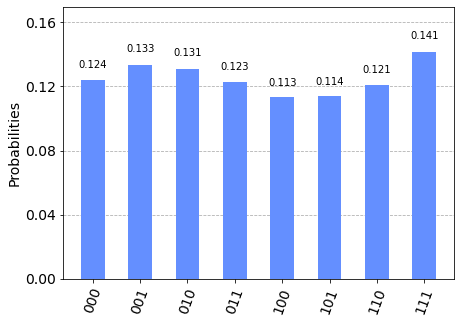

In [201]:
# # For IBMQ
# from qiskit.tools.monitor import job_monitor
# from qiskit.providers.ibmq import least_busy
# # Load local account information
# IBMQ.load_account()
# # Get the least busy backend
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x:
# x.configuration().n_qubits >= 2
# and not x.configuration().simulator
# and x.status().operational==True))

# job = execute(circuit, backend = backend, shots = 1024)
# job_monitor(job)

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 2048)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# simulator = Aer.get_backend('statevector_simulator')
# job = execute(circuit, simulator)
# result = job.result()
# statevector = result.get_statevector()
# print(statevector)
# plot_bloch_multivector(statevector)
